<a href="https://colab.research.google.com/github/Ashwin9515/CS506-Team-Project-Team09/blob/main/CS506_TP01_Team09_Ashwin_Akarsh_Divakar_Sara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1:** Importing Libraries & Dataset

**Objective:** Load required Python libraries and the IPL dataset for analysis.

**Pandas Concepts:**
1. read_csv() for importing datasets.
2. pd.set_option() and plotting setups using Matplotlib and Seaborn.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/all_season_summary.csv")

# Setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Shape: (1032, 45)

Columns:
 ['season', 'id', 'name', 'short_name', 'description', 'home_team', 'away_team', 'toss_won', 'decision', '1st_inning_score', '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result', 'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom', 'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']


**Section 2: Dataset Overview & Cleaning** - This section explores the structure and completeness of the IPL dataset. We visualize missing values to understand which columns are incomplete and proceed to clean the data by:
1. Dropping rows where the winner is missing (as they are critical to most analyses)
2. Converting date and score columns to appropriate formats
3. Engineering a new column to calculate the margin of victory.

Pandas Concepts: shape, columns, isnull(), dropna(), .copy(), to_datetime(), to_numeric() - DataFrame filtering, transformation, visualization with Seaborn

These steps ensure the dataset is ready for meaningful analysis in subsequent sections.


Missing Values:
 home_score          950
away_score          931
result_margin       854
points               67
reserve_umpire       29
highlights           26
home_key_bowler      23
away_key_bowler      21
pom                  14
away_wickets         12
away_runs            12
away_overs           12
away_key_batsman     12
away_boundaries      12
2nd_inning_score     12
home_wickets         10
home_key_batsman     10
1st_inning_score     10
home_overs           10
home_boundaries      10
home_runs            10
tv_umpire             5
toss_won              3
season                3
home_captain          3
away_captain          3
super_over            3
decision              3
away_playx1           3
home_playx1           3
umpire2               3
umpire1               3
match_days            3
referee               3
dtype: int64


<ipython-input-6-d5aa4096c269>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_df, y="Column", x="Missing Values", palette="flare")


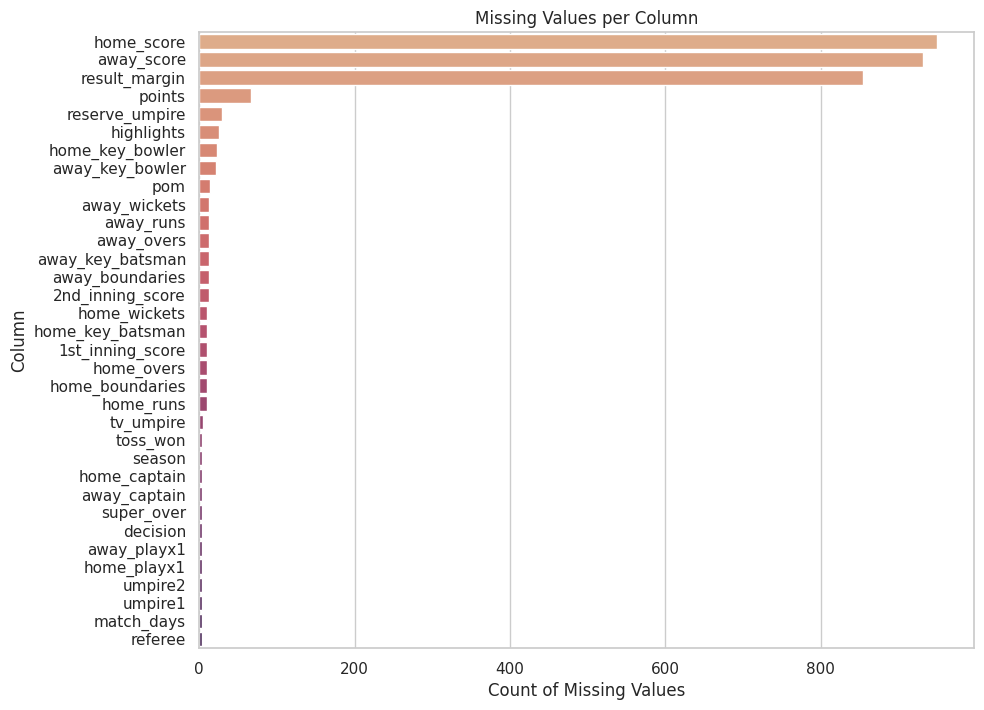


 Data cleaned. Shape after dropping null 'winner': (1031, 46)


In [6]:
# Missing values count
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0].sort_values(ascending=False))

# Visualize missing values
missing_df = pd.DataFrame({
    "Column": missing_values[missing_values > 0].index,
    "Missing Values": missing_values[missing_values > 0].values
}).sort_values(by="Missing Values", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=missing_df, y="Column", x="Missing Values", palette="flare")
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Column")
plt.show()

# Clean dataset: Drop rows where winner is missing and make a safe copy
df = df.dropna(subset=["winner"]).copy()

# Convert date columns to datetime
df["start_date"] = pd.to_datetime(df["start_date"])
df["end_date"] = pd.to_datetime(df["end_date"])

# Convert score columns to numeric (just in case there are issues)
df["home_score"] = pd.to_numeric(df["home_score"], errors="coerce")
df["away_score"] = pd.to_numeric(df["away_score"], errors="coerce")

# Add result margin column (difference between home and away scores)
df["result_margin"] = df[["home_score", "away_score"]].max(axis=1) - df[["home_score", "away_score"]].min(axis=1)

# Post-cleaning confirmation
print("\n Data cleaned. Shape after dropping null 'winner':", df.shape)


**Section 3:** Most Successful Teams

**Objective:** Identify which teams have won the most IPL matches.

**Pandas Concepts:**
1. value_counts() to count wins.
2. reset_index() to convert to DataFrame.
3. Bar plots using Seaborn.

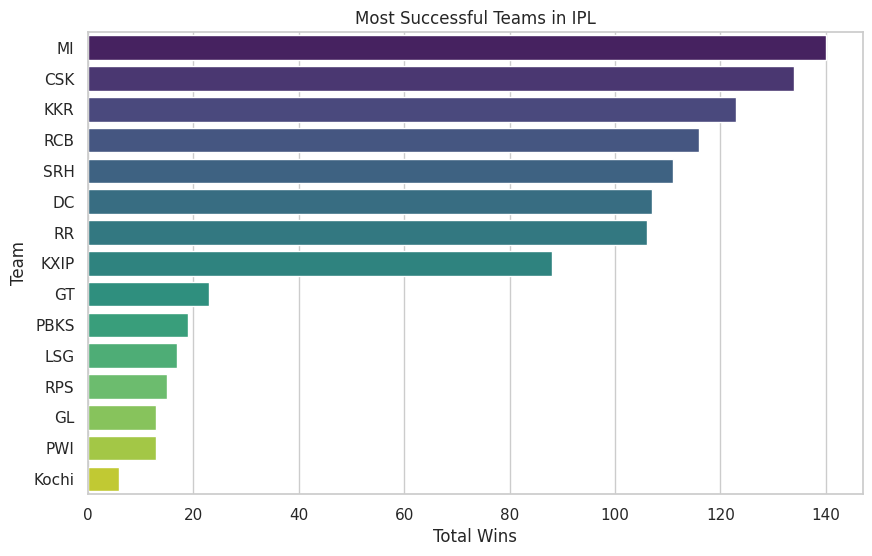

In [8]:
team_wins = df["winner"].value_counts().reset_index()
team_wins.columns = ["Team", "Total Wins"]
sns.barplot(data=team_wins, y="Team", x="Total Wins", hue="Team", palette="viridis", dodge=False, legend=False)
plt.title("Most Successful Teams in IPL")
plt.show()

Section 4: Toss Decision Impact
Objective:
Explore how toss decisions (bat or field) affect match outcomes.

Pandas Concepts:
Boolean comparison and new column creation.

groupby() and mean() for win-rate calculation.

Bar plots for categorical comparison.

<ipython-input-9-779b70a6e35b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=toss_win_rate, x="Toss Decision", y="Win Rate", palette="Set2")


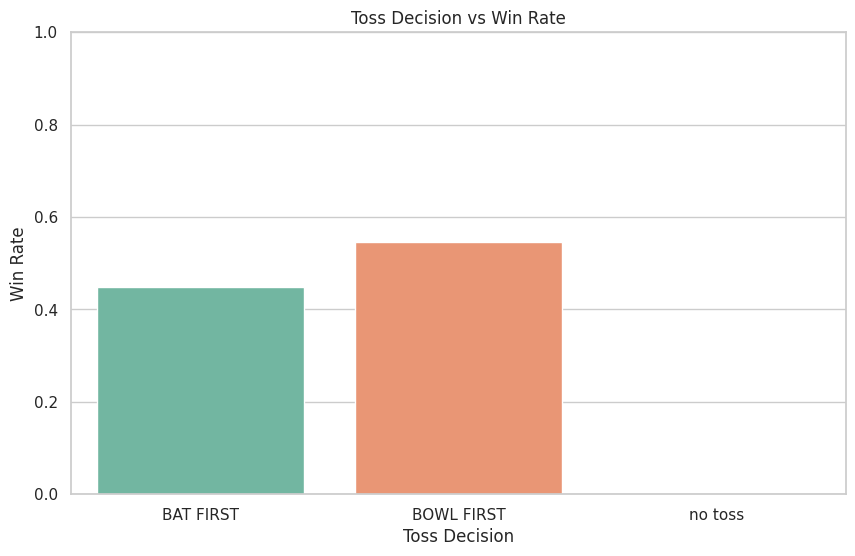

In [9]:
df["toss_match_win"] = df["toss_won"] == df["winner"]
toss_win_rate = df.groupby("decision")["toss_match_win"].mean().reset_index()
toss_win_rate.columns = ["Toss Decision", "Win Rate"]

sns.barplot(data=toss_win_rate, x="Toss Decision", y="Win Rate", palette="Set2")
plt.title("Toss Decision vs Win Rate")
plt.ylim(0, 1)
plt.show()

Section 5: Matches Per Season
Objective:
Analyze how many matches were played in each IPL season.

Pandas Concepts:
value_counts() and sort_values() for frequency analysis.

Line plots using Seaborn.

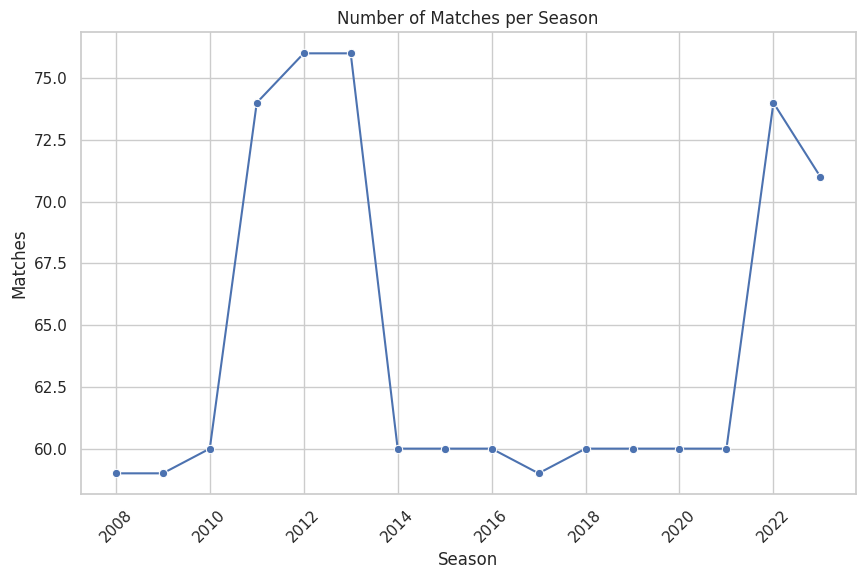

In [19]:
season_matches = df["season"].value_counts().reset_index()
season_matches.columns = ["Season", "Matches"]
season_matches = season_matches.sort_values(by="Season")

sns.lineplot(data=season_matches, x="Season", y="Matches", marker="o")
plt.title("Number of Matches per Season")
plt.xticks(rotation=45)
plt.show()

 Section 6: Popular Venues
Objective:
Determine which stadiums hosted the most matches.

Pandas Concepts:
value_counts() for venue frequency.

Bar plot for visualization.

<ipython-input-18-15c815e5eb94>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_counts, y="Venue", x="Matches", palette="magma")


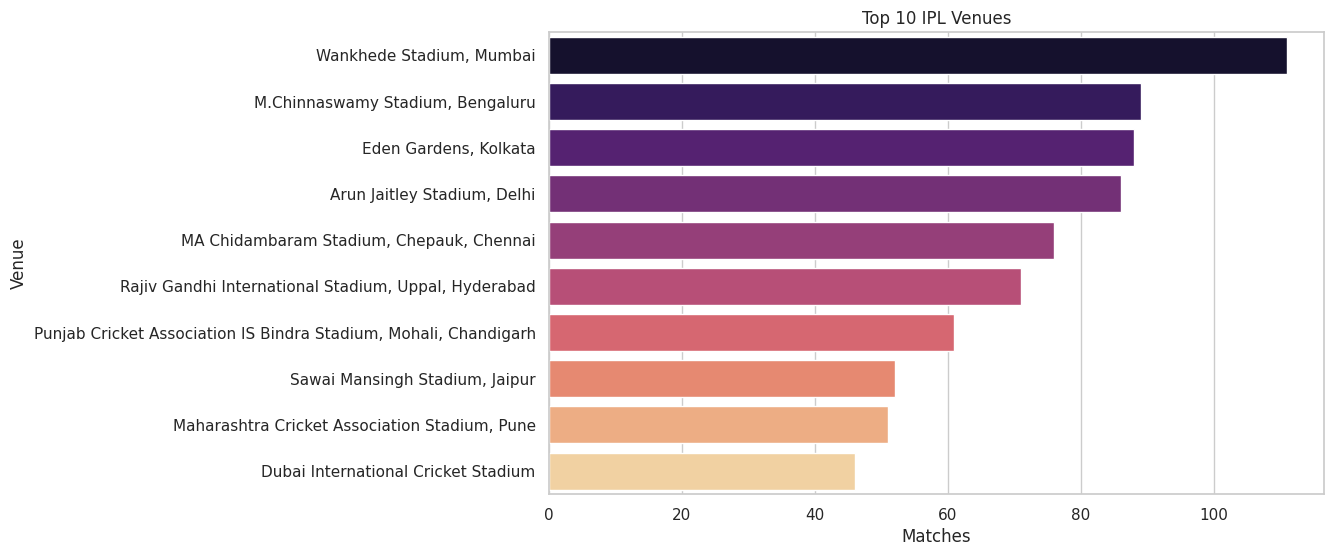

In [18]:
venue_counts = df["venue_name"].value_counts().reset_index().head(10)
venue_counts.columns = ["Venue", "Matches"]

sns.barplot(data=venue_counts, y="Venue", x="Matches", palette="magma")
plt.title("Top 10 IPL Venues")
plt.show()

Section 7: Top Players (Player of the Match)
Objective:
Identify the players who won the most "Player of the Match" awards.

Pandas Concepts:
value_counts() for award frequency.

Plotting top performers.

<ipython-input-12-42e34eecc972>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_players, x="Awards", y="Player", palette="cubehelix")


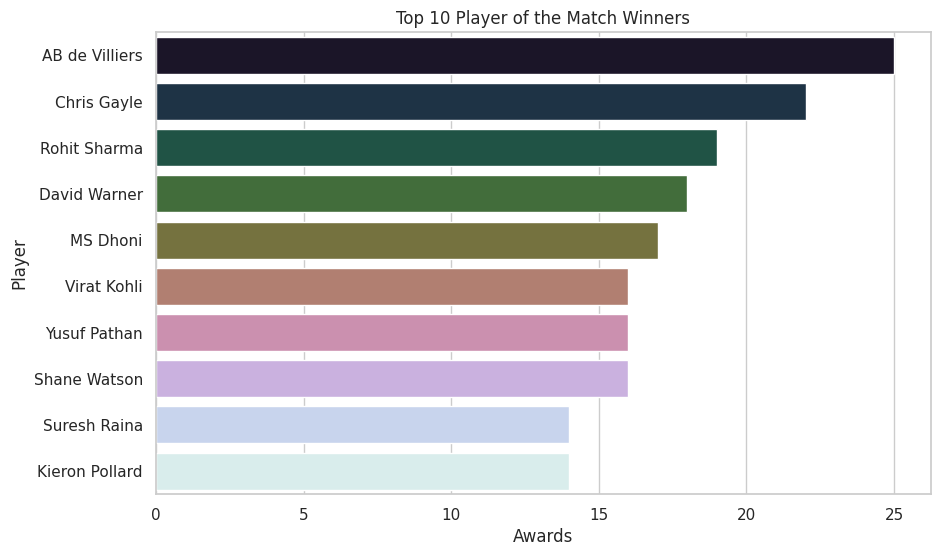

In [12]:
top_players = df["pom"].value_counts().reset_index().head(10)
top_players.columns = ["Player", "Awards"]

sns.barplot(data=top_players, x="Awards", y="Player", palette="cubehelix")
plt.title("Top 10 Player of the Match Winners")
plt.show()

 Section 8: Home vs Away Score Comparison
Objective:
Visualize and compare scores between home and away teams.

Pandas Concepts:
scatterplot() to compare two numeric columns.

Using hue to show match winner.

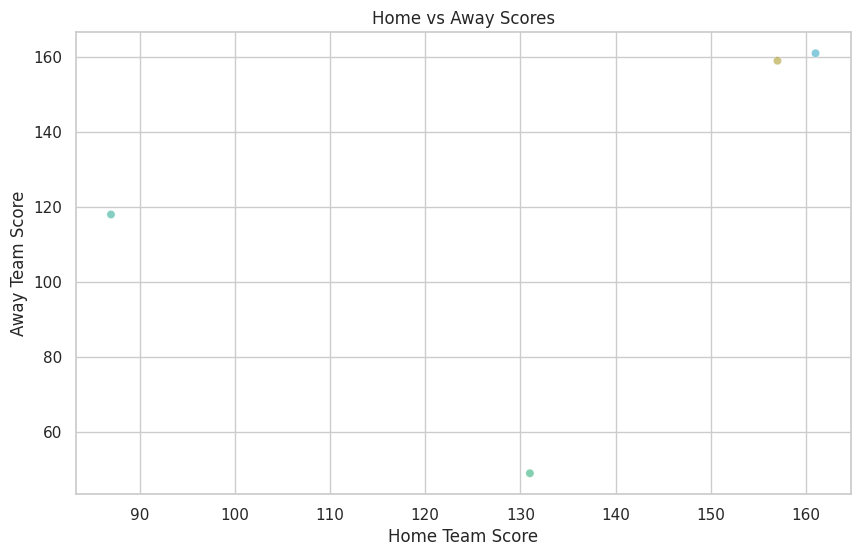

In [14]:
sns.scatterplot(data=df, x="home_score", y="away_score", hue="winner", alpha=0.6)
plt.title("Home vs Away Scores")
plt.xlabel("Home Team Score")
plt.ylabel("Away Team Score")
plt.legend([], [], frameon=False)
plt.show()

Section 9: Key Player Frequency
Objective:
Count how often key batsmen were listed across matches.

Pandas Concepts:
value_counts(), add() for merging two series.

sort_values() and bar plot.

<ipython-input-15-5179614fc9c2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=key_batsmen, x="Appearances", y="Player", palette="YlGnBu")


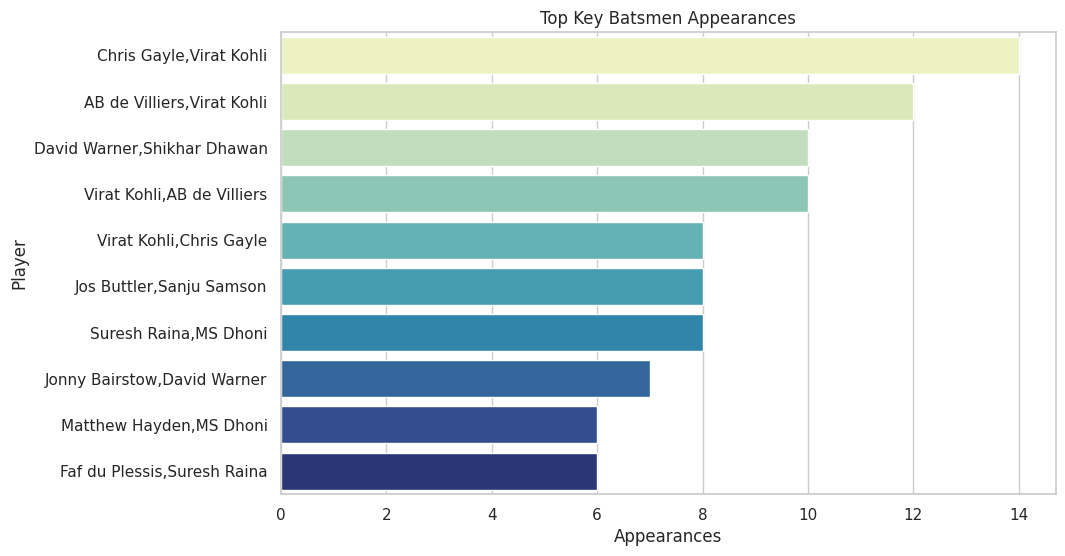

In [15]:
key_batsmen = df["home_key_batsman"].value_counts().add(df["away_key_batsman"].value_counts(), fill_value=0).sort_values(ascending=False).head(10)
key_batsmen = key_batsmen.reset_index()
key_batsmen.columns = ["Player", "Appearances"]

sns.barplot(data=key_batsmen, x="Appearances", y="Player", palette="YlGnBu")
plt.title("Top Key Batsmen Appearances")
plt.show()

Section 10: Final Summary Stats
Objective:
Print summary metrics about seasons, matches, venues, teams, and players.

Pandas Concepts:
nunique() and len() for dataset-wide stats.

In [17]:
print("\n Summary:")
print(f"Total Seasons: {df['season'].nunique()}")
print(f"Total Matches: {len(df)}")
print(f"Total Teams: {pd.unique(df['home_team']).size}")
print(f"Total Venues: {df['venue_name'].nunique()}")
print(f"Total Players of Match: {df['pom'].nunique()}")


 Summary:
Total Seasons: 16
Total Matches: 1031
Total Teams: 15
Total Venues: 37
Total Players of Match: 279


Advanced Match Outcomes: Victory Margin Analysis
Overview: Shows how teams tend to win — by dominating with runs or chasing with wickets.

🧠 Pandas Concepts:

.value_counts() – to count result types like "runs" or "wickets"

.reset_index() – to prepare data for plotting

.groupby() + .agg() (optional) – if extending to margin stats

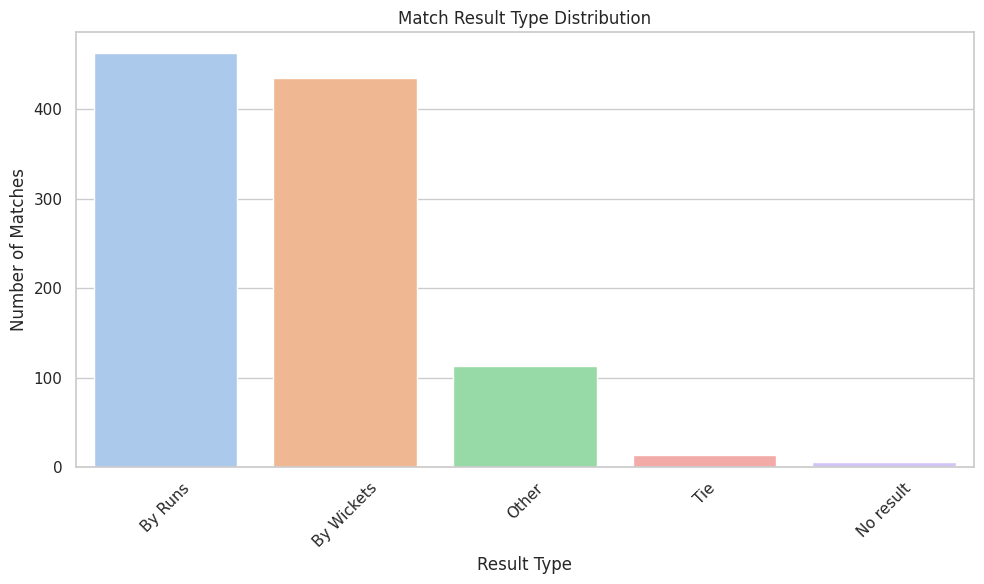

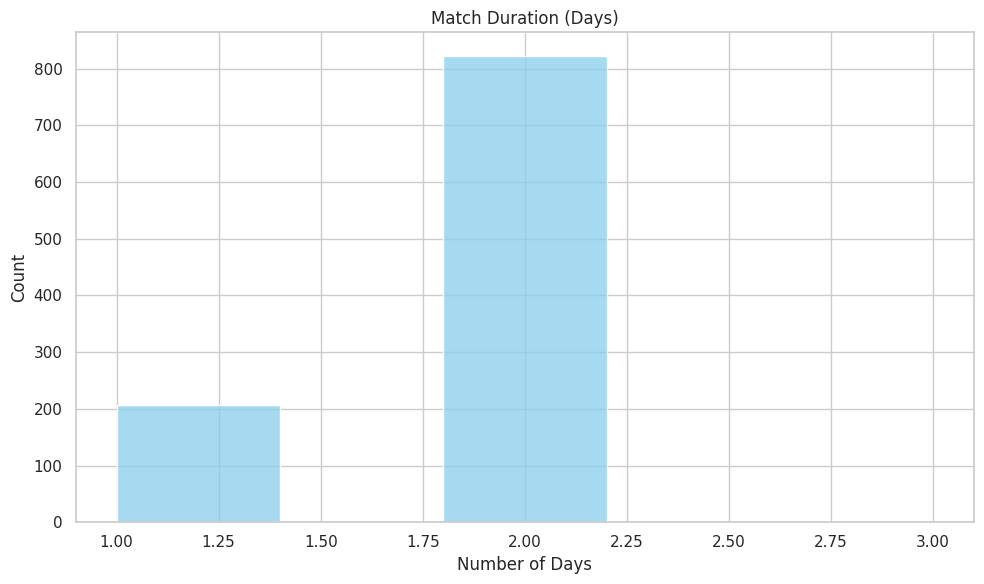

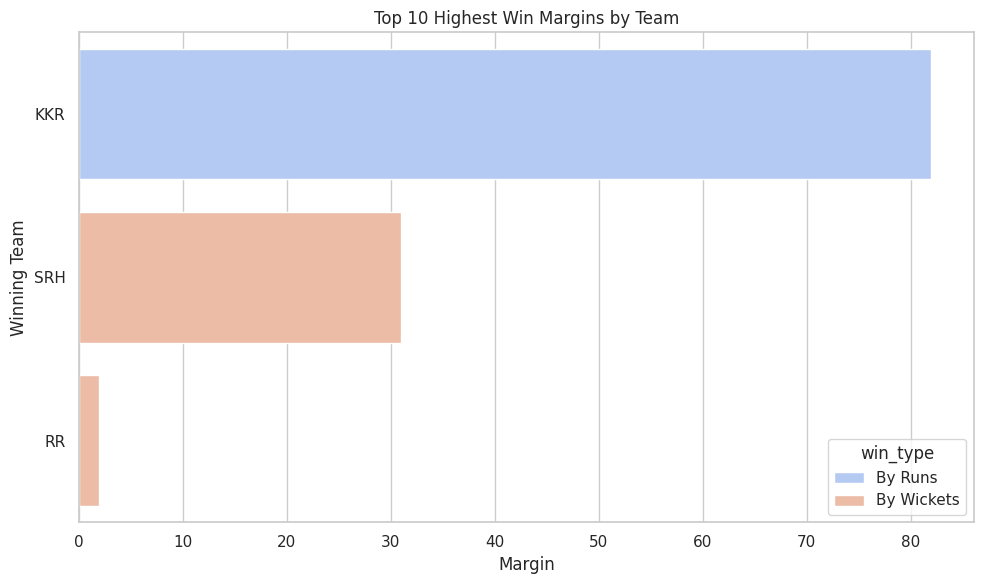

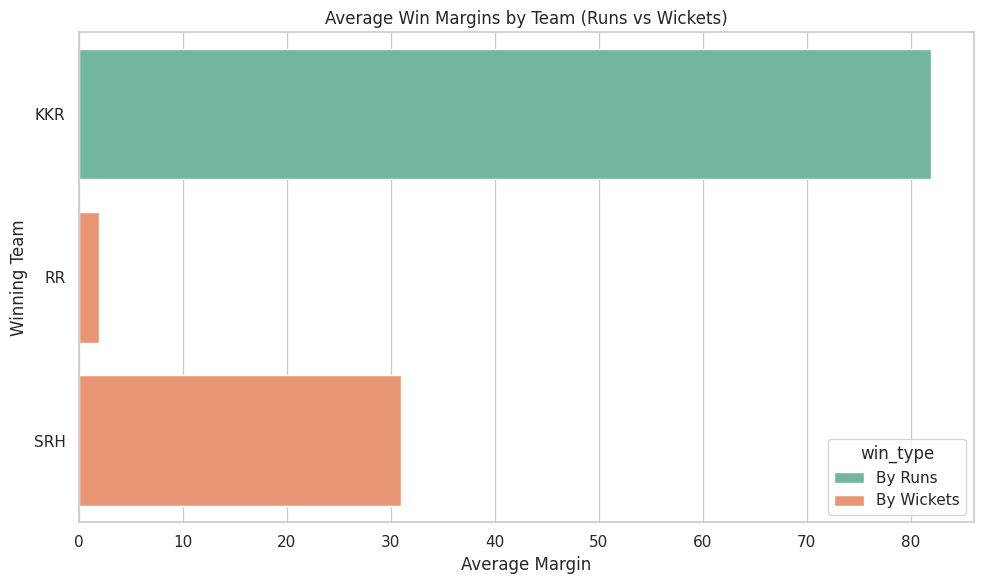

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Data Preprocessing and Result Type Extraction
df["result_type"] = df["result"].apply(lambda result: (
    "No result" if pd.isna(result) else
    "By Runs" if "run" in result.lower() else
    "By Wickets" if "wicket" in result.lower() else
    "Tie" if "tie" in result.lower() else
    "No result" if "no result" in result.lower() else "Other"))

# Plot Result Type Distribution
result_counts = df["result_type"].value_counts().reset_index()
# Assign 'result_type' to 'hue' and set 'legend=False'
sns.barplot(data=result_counts, x="result_type", y="count", hue="result_type", palette="pastel", dodge=False, legend=False)
plt.title("Match Result Type Distribution")
plt.xlabel("Result Type")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate Match Duration in Days
df["match_duration_days"] = (pd.to_datetime(df["end_date"]) - pd.to_datetime(df["start_date"])).dt.days
sns.histplot(df["match_duration_days"], bins=5, color="skyblue")
plt.title("Match Duration (Days)")
plt.xlabel("Number of Days")
plt.tight_layout()
plt.show()

# Win Margins (By Runs and Wickets)
runs_wins = df[df["home_score"] > df["away_score"]].assign(
    win_margin=lambda x: x["home_score"] - x["away_score"], win_type="By Runs", winner_team=lambda x: x["home_team"])
wickets_wins = df[df["away_score"] > df["home_score"]].assign(
    win_margin=lambda x: x["away_score"] - x["home_score"], win_type="By Wickets", winner_team=lambda x: x["away_team"])
win_margins = pd.concat([runs_wins, wickets_wins])

# Top 10 Maximum Win Margins
top_margins = win_margins.groupby(["winner_team", "win_type"])["win_margin"].max().reset_index()
sns.barplot(data=top_margins.nlargest(10, "win_margin"), x="win_margin", y="winner_team", hue="win_type", palette="coolwarm")
plt.title("Top 10 Highest Win Margins by Team")
plt.xlabel("Margin")
plt.ylabel("Winning Team")
plt.tight_layout()
plt.show()

# Average Win Margins
avg_margins = win_margins.groupby(["winner_team", "win_type"])["win_margin"].mean().reset_index()
sns.barplot(data=avg_margins, x="win_margin", y="winner_team", hue="win_type", palette="Set2")
plt.title("Average Win Margins by Team (Runs vs Wickets)")
plt.xlabel("Average Margin")
plt.ylabel("Winning Team")
plt.tight_layout()
plt.show()

Super Over & Margin Analytics
✅ Overview: Identifies how frequent Super Over matches are and how large or small typical win margins tend to be.

🧠 Pandas Concepts:

Boolean filtering (df["super_over"] == 1)

.value_counts() – to count Super Over games

Column creation (df["result_margin"] = max - min)

.histplot() – to show margin distribution

<ipython-input-23-78caf89c637e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=super_over_counts, x="Super Over", y="Count", palette="coolwarm")


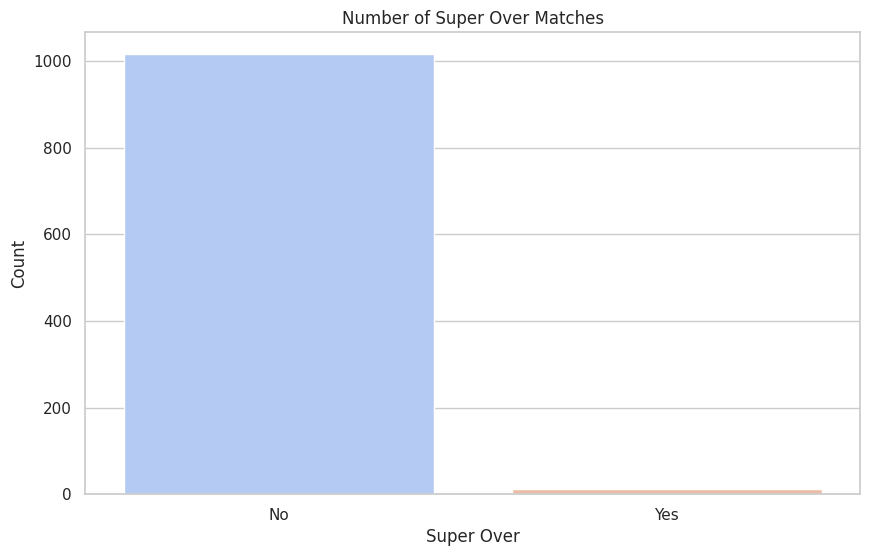

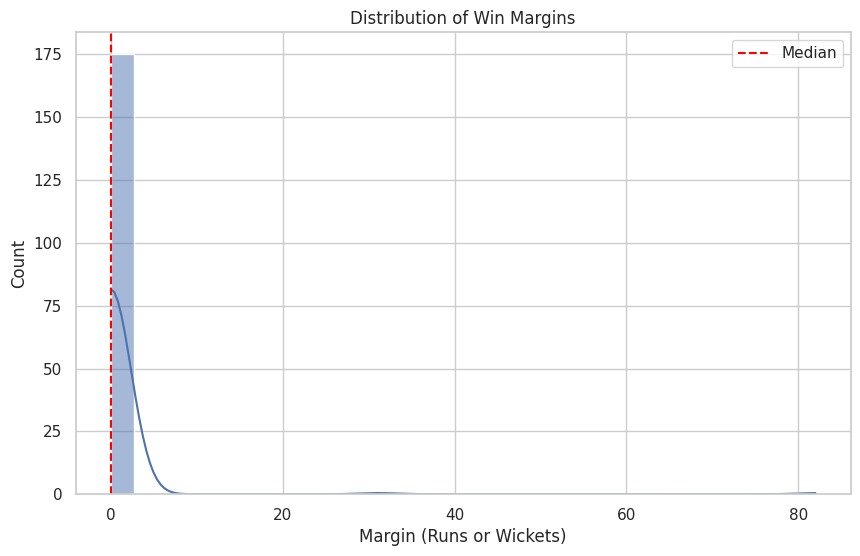

In [23]:
super_over_counts = df["super_over"].value_counts().reset_index()
super_over_counts.columns = ["Super Over", "Count"]

sns.barplot(data=super_over_counts, x="Super Over", y="Count", palette="coolwarm")
plt.title("Number of Super Over Matches")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

sns.histplot(df["result_margin"], bins=30, kde=True)
plt.title("Distribution of Win Margins")
plt.xlabel("Margin (Runs or Wickets)")
plt.axvline(df["result_margin"].median(), color='red', linestyle='--', label='Median')
plt.legend()
plt.show()

Captain & Umpire Insights
✅ Overview: Highlights which captains and umpires have been the most active across all IPL seasons.

🧠 Pandas Concepts:

.value_counts() – to count frequency

.add(..., fill_value=0) – to combine home and away appearances

.sort_values() – to rank by frequency

.reset_index() – for plotting

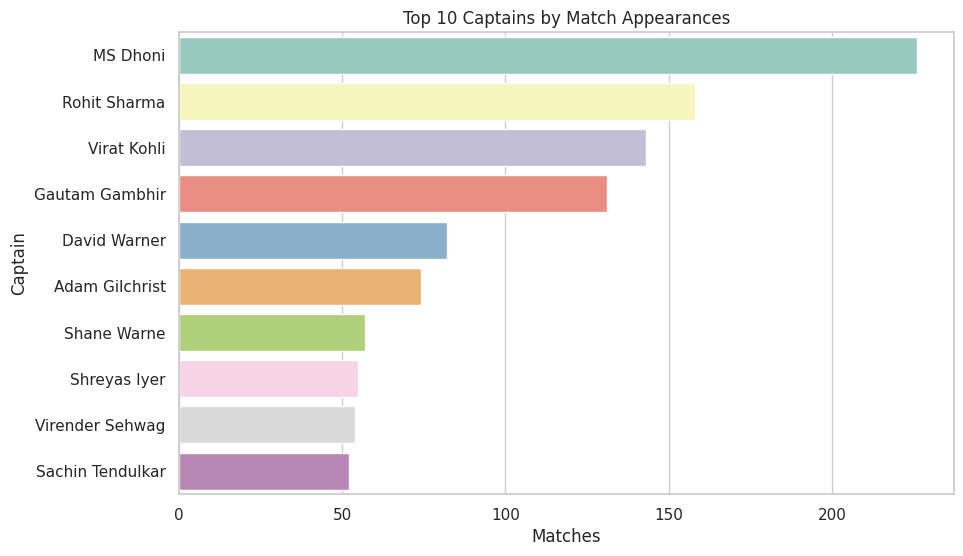

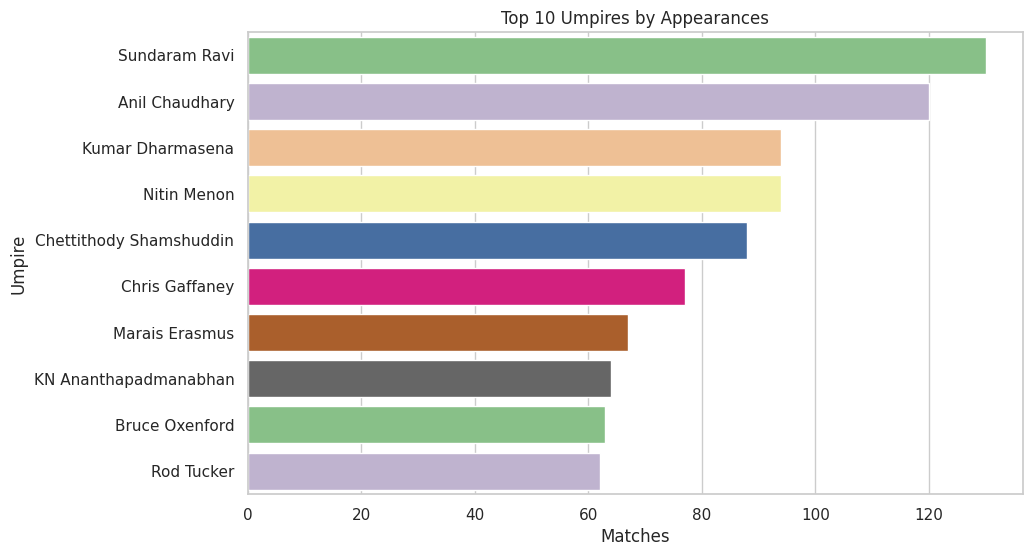

In [26]:
captains = df["home_captain"].value_counts().add(df["away_captain"].value_counts(), fill_value=0)
captains = captains.sort_values(ascending=False).head(10).reset_index()
captains.columns = ["Captain", "Matches"]

sns.barplot(data=captains, x="Matches", y="Captain", hue="Captain", palette="Set3", dodge=False, legend=False)
plt.title("Top 10 Captains by Match Appearances")
plt.show()

umpires = df["umpire1"].value_counts().add(df["umpire2"].value_counts(), fill_value=0)
umpires = umpires.sort_values(ascending=False).head(10).reset_index()
umpires.columns = ["Umpire", "Matches"]

sns.barplot(data=umpires, x="Matches", y="Umpire", hue="Umpire", palette="Accent", dodge=False, legend=False)
plt.title("Top 10 Umpires by Appearances")
plt.show()

Team Playstyles: Boundaries & Wickets
✅ Overview: Compares boundary-hitting trends between home and away teams to analyze aggressive play.

Pandas Concepts Used:
.groupby() – to group by team

Aggregation (.mean() or .sum()) – to calculate average/total boundaries

Column math – for boundary differences

Merging DataFrames – to bring home/away stats together

Interpretation Tips:
Teams with positive values tend to play more aggressively at home.

Teams with negative values are more boundary-heavy in away games (perhaps due to venue size or strategy).

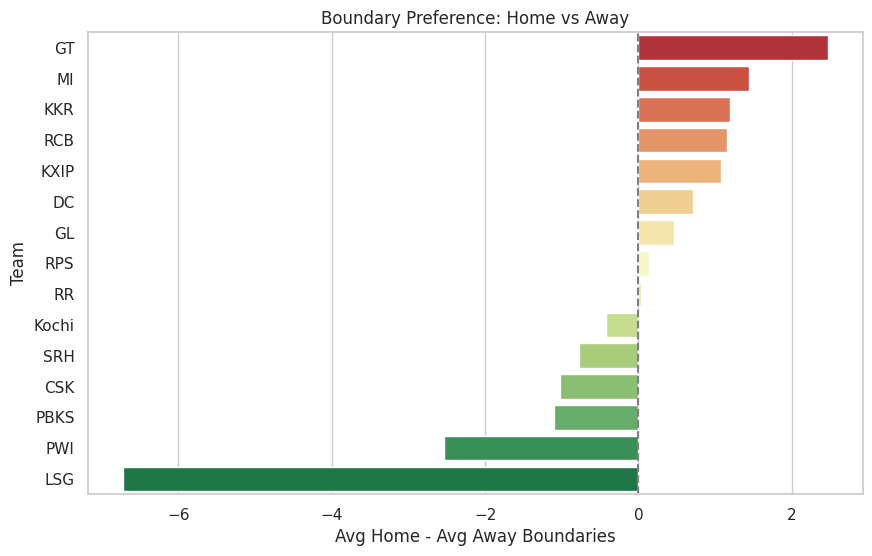

In [29]:
# Step 1: Group by home_team and away_team for boundary stats
home_boundaries = df.groupby("home_team")["home_boundaries"].mean().reset_index()
home_boundaries.columns = ["Team", "Avg_Home_Boundaries"]

away_boundaries = df.groupby("away_team")["away_boundaries"].mean().reset_index()
away_boundaries.columns = ["Team", "Avg_Away_Boundaries"]

# Step 2: Merge them
team_boundary_profile = pd.merge(home_boundaries, away_boundaries, on="Team", how="inner")

# Step 3: Calculate difference (positive = more boundaries at home)
team_boundary_profile["Boundary_Diff"] = (
    team_boundary_profile["Avg_Home_Boundaries"] - team_boundary_profile["Avg_Away_Boundaries"]
)

# Step 4: Sort for insight
team_boundary_profile = team_boundary_profile.sort_values(by="Boundary_Diff", ascending=False)

# Step 5: Visualize
sns.barplot(
    data=team_boundary_profile,
    x="Boundary_Diff",
    y="Team",
    hue="Team",  # Assign 'Team' to hue
    palette="RdYlGn",
    dodge=False,
    legend=False  # Remove legend
)
plt.title("Boundary Preference: Home vs Away")
plt.xlabel("Avg Home - Avg Away Boundaries")
plt.axvline(0, color='gray', linestyle='--')
plt.show()